<center><h1>Binomial Distribution</h1></center>

The repetition of multiple independent Bernoulli trials is called a Bernoulli process.

- A coin toss is a Bernoulli trials. 
- Tossing the coin 5 times in a row to see how many times we get heads is a Bernoulli process.

The outcomes of a Bernoulli process gives us a Binomial distribution. 
- As such, the Bernoulli distribution would be a Binomial distribution with a single trial.

- Meaning doing multiple Bernoulli process and recording their output will give us a binomial distribution.

The Binomial distribution summarizes the number of successes k in a given number of Bernoulli trials n, with a given probability of success for each trial p.

- As an example, you can toss a coin 5 times, each coin toss has 50-50 chance of head or tails. But you can get 3 heads out of 5 sometimes, 1 head out of 5, many things are possible, to do this many times and to look at the output distribution is what binomial distribution is all about.

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is the same for all the trials is called a Binomial Distribution. However, The outcomes need not be equally likely, and each trial is independent of each other.

The parameters of a binomial distribution are ```n``` and ```p``` where ```n``` is the total number of trials, and ```p``` is the probability of success in each trial.

In [1]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 50)

In [3]:
# result of flipping a coin 10 times, tested 100 times.
s

array([7, 7, 6, 6, 6, 8, 5, 4, 5, 8, 4, 8, 6, 6, 7, 5, 6, 6, 6, 7, 5, 4,
       3, 8, 3, 6, 4, 7, 3, 9, 4, 3, 5, 6, 3, 6, 4, 4, 3, 6, 5, 6, 4, 5,
       8, 8, 4, 5, 3, 7])

## Real world example. 
- A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?


### Using scipy 
To do this calculation all the time is tedious for us. To do this in a simplified manner, we can use ```Scipy```.

In [4]:
# We can use scipy.stats to calculate this
from scipy.stats import binom

And we can calculate binomial probability by ```binom.pmf```, where ```p``` is the probability, ```n``` is the number of attempts, and ```k``` is the number of successes.

So for our example, we have
- 0.1 is the probability(```p```) of finding oil
- ```n``` is 9, as we have 9 oil wells to dig.
- ```k``` is 0, as we are looking for the probability of finding no oil(or 0) in all of the wells.

In [5]:
binom.pmf(k=0, n=9, p=0.1)

0.3874204890000001

answer = 0.38455, or 38%.

So, there is a 38% chance of us digging 9 oil wells and all of them being empty

In [6]:
# What is the probability of flipping the coin 10 times and finding heads 2 times.
binom.pmf(k=2, n=10, p=0.5)

0.04394531250000004

There is about 4% chance of us finding heads 2 times, if we flip it 10 times

# Visualizing our learning

In [7]:
from ipywidgets import interact, interactive
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
####################################################################################################
# Making the widgets
prob_success = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1,
    step=0.1,
    description='Probability of success:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    style={'description_width': 'initial'}

)

num_trials = widgets.IntSlider(
    value=10,
    min=1,
    max=100,
    step=1,
    description='Number of Trials:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)


num_simulation = widgets.IntSlider(
    value=10,
    min=1,
    max=1000,
    step=1,
    description='Number of Simulations:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)


####################################################################################################

def create_binomial(prob_success,num_trials,num_simulation):

    sampl = np.random.binomial(num_trials,prob_success,size=num_simulation)

    plt.hist(sampl) 
    plt.title("histogram") 
    plt.show()
####################################################################################################


interactive_plot = interactive(create_binomial,prob_success=prob_success,num_trials=num_trials, num_simulation=num_simulation)
interactive_plot

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Probability of success:', m…

# Given this knowledge that we now have

Let's try to solve some questions

# Question
Given a dataset collected from the IPL, 'deliveries.csv' which gives us ball by ball data. 

- Calculate the binomial distribution of getting 2 wickets in the next over if 'Harbhajan Singh' is bowling.
- Calculate the binomial distribution of getting 1 six in the next over if Virat Kohli or 'V Kohli' is batting.
- Calculate the binomial distribution of the batting team scoring 10 runs of more in the last over for 2 of the next 10 matches.
- Calculate the probability for the next 10 games going over 18 overs.

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('dataset/deliveries.csv')

In [64]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [65]:
df.shape

(179078, 21)

In [66]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Question 1
Calculate the probability of getting 2 wickets in the next over if 'Harbhajan Singh' is bowling.

In [68]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [69]:
df['bowler']

0           TS Mills
1           TS Mills
2           TS Mills
3           TS Mills
4           TS Mills
             ...    
179073    SL Malinga
179074    SL Malinga
179075    SL Malinga
179076    SL Malinga
179077    SL Malinga
Name: bowler, Length: 179078, dtype: object

In [70]:
df['bowler'] == 'Harbhajan Singh'

0         False
1         False
2         False
3         False
4         False
          ...  
179073    False
179074    False
179075    False
179076    False
179077    False
Name: bowler, Length: 179078, dtype: bool

In [72]:
# Getting the balls bowled by Harbhajan Singh 
df[df['bowler'] == 'Harbhajan Singh']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1478,7,1,Kolkata Knight Riders,Mumbai Indians,9,1,MK Pandey,YK Pathan,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1479,7,1,Kolkata Knight Riders,Mumbai Indians,9,2,MK Pandey,YK Pathan,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1480,7,1,Kolkata Knight Riders,Mumbai Indians,9,3,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1481,7,1,Kolkata Knight Riders,Mumbai Indians,9,4,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
1482,7,1,Kolkata Knight Riders,Mumbai Indians,9,5,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178895,11415,1,Mumbai Indians,Chennai Super Kings,11,2,Ishan Kishan,AS Yadav,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178896,11415,1,Mumbai Indians,Chennai Super Kings,11,3,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178897,11415,1,Mumbai Indians,Chennai Super Kings,11,4,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178898,11415,1,Mumbai Indians,Chennai Super Kings,11,5,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [74]:
df[df['bowler'] == 'Harbhajan Singh']['player_dismissed']

1478      NaN
1479      NaN
1480      NaN
1481      NaN
1482      NaN
         ... 
178895    NaN
178896    NaN
178897    NaN
178898    NaN
178899    NaN
Name: player_dismissed, Length: 3451, dtype: object

In [75]:
# Getting all the rows where he took a wicket
df[df['bowler'] == 'Harbhajan Singh']['player_dismissed'].isna()

1478      True
1479      True
1480      True
1481      True
1482      True
          ... 
178895    True
178896    True
178897    True
178898    True
178899    True
Name: player_dismissed, Length: 3451, dtype: bool

In [76]:
# Adding them up
df[df['bowler'] == 'Harbhajan Singh']['player_dismissed'].isna().sum()

3290

In [19]:
# Figuring out how many balls he bowled
df[df['bowler'] == 'Harbhajan Singh'].shape

(3451, 21)

So he bowled 3451 balls, out of which 3290 were without wickets.

In [20]:
# Total wickets 
total_wickets = 3451-3290
total_wickets

161

So 161 wickets out of 3451 balls

In [21]:
# Figuring out the wicket rate
success_rate = 161/3451
success_rate

0.04665314401622718

### So, now that we have a wicket rate, we need to find out the probabiltiy of him getting 2 wickets in the next 6 balls

### Using scipy 

In [77]:
# We can use scipy.stats to calculate this
from scipy.stats import binom

And we can calculate binomial probability by ```binom.pmf```, where ```p``` is the probability, ```n``` is the number of attempts, and ```k``` is the number of successes.

So for our example, we have

In [78]:
binom.pmf(k=2, n=6, p=0.04665314401622718)

0.02696850345872654

We have a 2 % probability of this event happening, visualising the same through simulation.

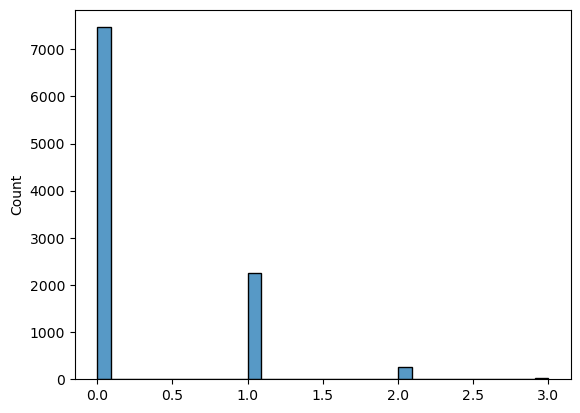

In [79]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(random.binomial(n=6, p=0.04665314401622718, size=10000), kde=False)

plt.show()

With this we can confirm that most likely he will not take a wicket, might take 1, and the probability of taking 2 is very low at 2 %

-----

## Question 2
Calculate the probability using binomial distribution of getting 1 six in the next over if Virat Kohli or 'V Kohli' is batting.

In [80]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [82]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [85]:
df['batsman'] == 'V Kohli'

0         False
1         False
2         False
3         False
4         False
          ...  
179073    False
179074    False
179075    False
179076    False
179077    False
Name: batsman, Length: 179078, dtype: bool

In [86]:
df[df['batsman'] == 'V Kohli']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177522,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,7,V Kohli,AB de Villiers,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177523,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177524,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177525,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [87]:
# Filtering out the rows where kohli is the batsman
df_kohli = df[df['batsman'] == 'V Kohli']

In [89]:
df_kohli

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177522,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,7,V Kohli,AB de Villiers,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177523,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177524,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177525,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [90]:
df_kohli['batsman_runs']

2590      0
2591      1
2593      0
2594      1
2597      0
         ..
177522    1
177523    4
177524    6
177525    1
177527    0
Name: batsman_runs, Length: 4211, dtype: int64

In [92]:
df_kohli['batsman_runs'] == 6

2590      False
2591      False
2593      False
2594      False
2597      False
          ...  
177522    False
177523    False
177524     True
177525    False
177527    False
Name: batsman_runs, Length: 4211, dtype: bool

In [94]:
df_kohli[df_kohli['batsman_runs'] == 6]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2673,12,1,Royal Challengers Bangalore,Mumbai Indians,14,5,V Kohli,AB de Villiers,JJ Bumrah,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
3945,17,2,Royal Challengers Bangalore,Rising Pune Supergiant,1,3,V Kohli,Mandeep Singh,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
4651,20,1,Royal Challengers Bangalore,Gujarat Lions,15,5,V Kohli,TM Head,S Kaushik,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
6931,30,1,Royal Challengers Bangalore,Gujarat Lions,2,5,V Kohli,CH Gayle,Basil Thampi,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175812,11337,2,Royal Challengers Bangalore,Delhi Capitals,5,3,V Kohli,PA Patel,I Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176412,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,1,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176413,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,2,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176418,11340,1,Royal Challengers Bangalore,Rajasthan Royals,2,1,V Kohli,AB de Villiers,S Gopal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [95]:
# Finding out the rows where he hit six'es
df_kohli_six = df_kohli[df_kohli['batsman_runs'] == 6]

In [96]:
# You can now have a look at the column 'total'
df_kohli_six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2673,12,1,Royal Challengers Bangalore,Mumbai Indians,14,5,V Kohli,AB de Villiers,JJ Bumrah,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
3945,17,2,Royal Challengers Bangalore,Rising Pune Supergiant,1,3,V Kohli,Mandeep Singh,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
4651,20,1,Royal Challengers Bangalore,Gujarat Lions,15,5,V Kohli,TM Head,S Kaushik,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
6931,30,1,Royal Challengers Bangalore,Gujarat Lions,2,5,V Kohli,CH Gayle,Basil Thampi,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175812,11337,2,Royal Challengers Bangalore,Delhi Capitals,5,3,V Kohli,PA Patel,I Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176412,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,1,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176413,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,2,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176418,11340,1,Royal Challengers Bangalore,Rajasthan Royals,2,1,V Kohli,AB de Villiers,S Gopal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [97]:
# Calculating six shape 
df_kohli_six.shape

(191, 21)

In [33]:
# Calculating shape for all balls played by kohli
df_kohli.shape

(4211, 21)

In [34]:
sixes_success_rate = 191/4211
sixes_success_rate

0.04535739729280456

So out of 4211 balls, kohli hit sixes on 191 balls, giving us a six success rate of about 4%. Now, let's calculate the probability of him scoring a six in the next 6 balls.

In [98]:
from scipy.stats import binom

#calculate binomial probability
binom.pmf(k=1, n=6, p=0.04535739729280456)

0.21577614733156159

So, out of the next 6 balls, the probability of kohli hitting 1 six is 21 %, very impressive if you ask me. Let's visualize the same.

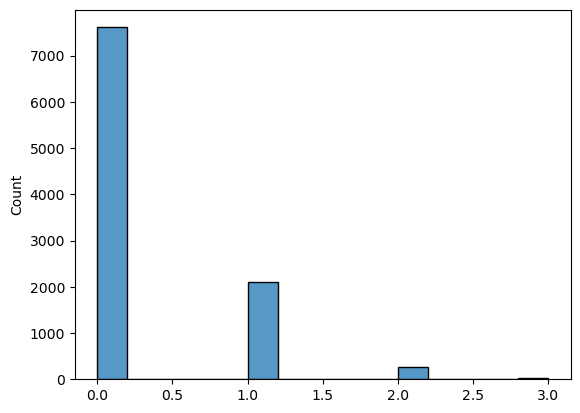

In [99]:
sns.histplot(random.binomial(n=6, p=0.04535739729280456, size=10000), kde=False)
plt.show()

## Question 3
Calculate the probability using binomial distribution of the batting team scoring 10 runs of more in the last over for 2 of the next 10 matches.

In [100]:
# First, we will need to figure out how manny times has the batting team scores more than 10 runs in the last over.
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [102]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [105]:
df['over'] == 20

0         False
1         False
2         False
3         False
4         False
          ...  
179073     True
179074     True
179075     True
179076     True
179077     True
Name: over, Length: 179078, dtype: bool

In [106]:
df[df['over'] == 20]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
119,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,1,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [112]:
# Getting the data for last overs
df_last_over = df[df['over'] == 20]
df_last_over

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
119,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,1,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [113]:
df_last_over.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
119,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,1,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
244,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
247,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,A Choudhary,YS Chahal,BCJ Cutting,0,...,0,0,0,0,0,0,0,YS Chahal,run out,CJ Jordan (sub)


In [114]:
# Let's look at how many matches have been played in our dataset
df['match_id'].nunique()

756

In [115]:
# Now, let's look at the total number of matches where the game went all the way (20 overs)
df_last_over['match_id'].nunique()

716

In [117]:
df_last_over.groupby(['match_id','inning'])['total_runs'].sum()

match_id  inning
1         1         16
          2          7
2         1         30
          2         15
3         1         14
                    ..
11413     1         13
          2          8
11414     1         16
11415     1          9
          2          7
Name: total_runs, Length: 1155, dtype: int64

<AxesSubplot:ylabel='Frequency'>

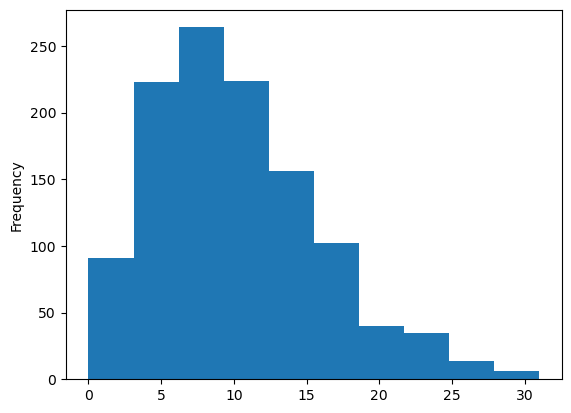

In [118]:
df_last_over.groupby(['match_id','inning'])['total_runs'].sum().plot(kind='hist')

In [119]:
# Now to figure out what was the total score for each match in the last over
# df_last_over.groupby('match_id')['total_runs'].sum().plot(kind='hist')

In [120]:
# Converting to dataframe
df_last_over_runs = df_last_over.groupby(['match_id','inning'])['total_runs'].sum()

In [121]:
df_last_over_runs

match_id  inning
1         1         16
          2          7
2         1         30
          2         15
3         1         14
                    ..
11413     1         13
          2          8
11414     1         16
11415     1          9
          2          7
Name: total_runs, Length: 1155, dtype: int64

So now that we know for the matches that did go all the way, how many runs were scored in the last over, we can find out for how many of them, more than 10 runs were scored. 

In [122]:
df_last_over_runs.shape

(1155,)

In [123]:
df_last_over_runs > 10

match_id  inning
1         1          True
          2         False
2         1          True
          2          True
3         1          True
                    ...  
11413     1          True
          2         False
11414     1          True
11415     1         False
          2         False
Name: total_runs, Length: 1155, dtype: bool

In [124]:
df_last_over_runs[df_last_over_runs > 10]

match_id  inning
1         1         16
2         1         30
          2         15
3         1         14
4         1         16
                    ..
11343     1         22
11344     1         16
11345     1         29
11413     1         13
11414     1         16
Name: total_runs, Length: 501, dtype: int64

In [125]:
df_last_over_runs[df_last_over_runs > 10].shape

(501,)

In [126]:
proba_of_more_10 = (501 / (716*2))
proba_of_more_10

0.3498603351955307

So the probability of scoring more than 10 runs in the last over is about 34%. Now let's calculate binomial distribution for the same.

In [128]:
from scipy.stats import binom

#calculate binomial probability
binom.pmf(k=2, n=10, p=0.3498603351955307)

0.1758147201184886

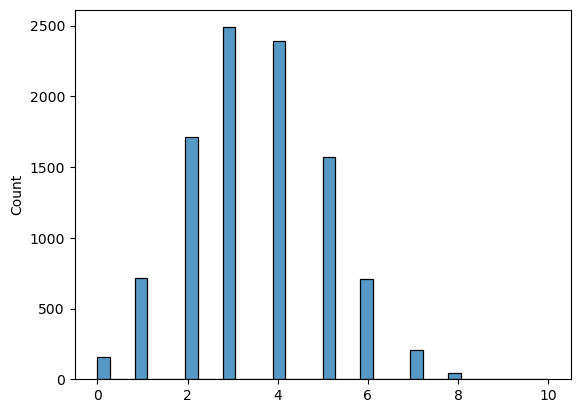

In [129]:
sns.histplot(random.binomial(n=10, p=0.3498603351955307, size=10000), kde=False)
plt.show()

# Question 4
Calculate the probability for the next 10 games going over 18 overs.

In [52]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


First, we need to filter out the matches where the overs went above 15, for this i will filter if the match id has a over '15', if it does not, than we can assume that the match ended before that.

In [53]:
df_over_18 = df[df['over'] > 18]

In [54]:
df_over_18

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
113,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,1,DJ Hooda,Yuvraj Singh,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
114,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,2,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
115,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,3,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
117,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,5,BCJ Cutting,DJ Hooda,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


Now, i can count all the unique match id's 

In [55]:
df_over_18['match_id'].nunique()

727

So 727 matches went above 18 overs, let's see how many unique matches are there in the orignal dataset

In [56]:
df['match_id'].nunique()

756

So out of 756 matches played, 727 matches did go till the 18th over, which gives us a success rate of 

In [57]:
df_over_18_proba = (727 / 756)
df_over_18_proba

0.9616402116402116

3 % chance of the match not making it to the 18th over, 97% chance of it doing so.

In [58]:
from scipy.stats import binom

#calculate binomial probability
binom.pmf(k=10, n=10, p=0.9616402116402116)

0.676279392060555

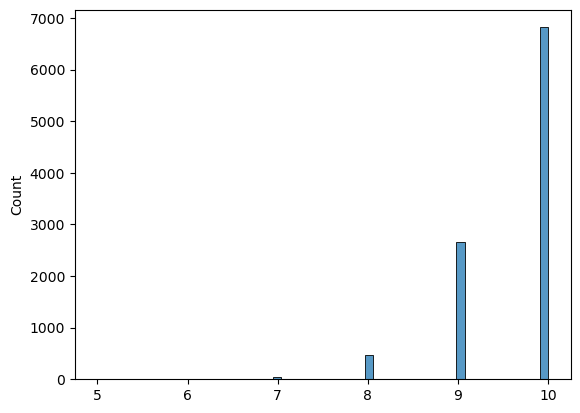

In [59]:
sns.histplot(random.binomial(n=10, p=0.9616402116402116, size=10000), kde=False)
plt.show()

<h1><center> And, that's a wrap </center></h1>

# Summary
- We have learned about the Binomial distribution and it's behaviour.
- Learned about how to use it in the real world.
- Learned about where to use it in the real world.